# 1.Get all the data from the website

In [102]:
import pip
import pandas as pd
from sodapy import Socrata
client = Socrata("data.cms.gov", None)
results = client.get("s2uc-8wxp",limit=999999)

# Convert to pandas DataFrame and firstly name it as results_df
results_df = pd.DataFrame.from_records(results)

## 1.1 Make a primary exploration of the data, observe the data types and characteristics

In [103]:
# Get NY state data
df = results_df[results_df["provider_state"] == "NY"]

In [104]:
df.head()

,week_ending,federal_provider_number,provider_name,provider_address,provider_city,provider_state,provider_zip_code,submitted_data,county,geolocation,...,has_facility_performed_staff_and_or_personnel_tests_since_last_report,tested_staff_and_or_personnel_with_new_signs_or_symptoms,tested_asymptomatic_staff_and_or_personnel_in_a_unit_or_section_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_facility_wide_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_without_known_exposure_as_surveillance,tested_another_subgroup_of_staff_and_or_personnel,number_of_ventilators_in,number_of_ventilators_in_1,any_current_supply_of,one_week_supply_of_ventilator
71,2020-05-24T00:00:00.000,335317,PARK TERRACE CARE CENTER,59 20 VAN DOREN STREET,CORONA,NY,11368,N,Queens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2020-06-07T00:00:00.000,335379,REGO PARK NURSING HOME,111 26 CORONA AVENUE,FLUSHING,NY,11368,N,Queens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2020-05-24T00:00:00.000,335859,GOOD SHEPHERD VILLAGE AT ENDWELL,14 VILLAGE DRIVE,ENDWELL,NY,13760,N,Broome,"{'type': 'Point', 'coordinates': [-76.021268, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2020-07-12T00:00:00.000,335862,NEW YORK-PRESBYTERIAN / QUEENS T C U,56-45 MAIN STREET,FLUSHING,NY,11355,Y,Queens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2020-05-24T00:00:00.000,335871,MOUNT SINAI SOUTH NASSAU T C U,1 HEALTHY WAY,OCEANSIDE,NY,11572,N,Nassau,"{'type': 'Point', 'coordinates': [-73.630803, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 71 to 156347
Data columns (total 92 columns):
week_ending                                                                               9872 non-null object
federal_provider_number                                                                   9872 non-null object
provider_name                                                                             9872 non-null object
provider_address                                                                          9872 non-null object
provider_city                                                                             9872 non-null object
provider_state                                                                            9872 non-null object
provider_zip_code                                                                         9872 non-null object
submitted_data                                                                            9872 non-null object
co

In [106]:
df.describe()

,week_ending,federal_provider_number,provider_name,provider_address,provider_city,provider_state,provider_zip_code,submitted_data,county,geolocation,...,has_facility_performed_staff_and_or_personnel_tests_since_last_report,tested_staff_and_or_personnel_with_new_signs_or_symptoms,tested_asymptomatic_staff_and_or_personnel_in_a_unit_or_section_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_facility_wide_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_without_known_exposure_as_surveillance,tested_another_subgroup_of_staff_and_or_personnel,number_of_ventilators_in,number_of_ventilators_in_1,any_current_supply_of,one_week_supply_of_ventilator
count,9872,9872,9872,9872,9872,9872,9872,9872,9872,8896,...,2381,2404,2404,2404,2404,2404,978,978,979,979
unique,16,617,616,616,290,1,377,2,60,552,...,2,2,2,2,2,2,56,50,2,2
top,2020-06-21T00:00:00.000,335495,ST ANNS COMMUNITY,46 HARRIMAN DRIVE,BRONX,NY,11691,Y,Queens,"{'type': 'Point', 'coordinates': [-73.62299, 4...",...,Y,N,N,N,Y,N,20,0,Y,Y
freq,617,16,32,32,672,9872,176,9684,944,32,...,2232,2344,2364,2348,1982,2185,64,795,978,977


In [108]:
# Convert week_ending's data type to datime
df['week_ending']=pd.to_datetime(df['week_ending'])

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
df1 = pd.DataFrame(df1)

In [112]:
df1['staff_death_rate']=df1['staff_weekly_covid_19_deaths']/df1['staff_weekly_confirmed_covid']

In [113]:
df1

,staff_weekly_confirmed_covid,staff_weekly_covid_19_deaths,staff_death_rate
county,,,
Albany,224.0,1.0,0.004464
Allegany,4.0,0.0,0.000000
Bronx,1585.0,12.0,0.007571
Broome,154.0,0.0,0.000000
Cattaraugus,28.0,0.0,0.000000
Cayuga,8.0,0.0,0.000000
Chautauqua,36.0,0.0,0.000000
Chemung,8.0,1.0,0.125000
Chenango,37.0,0.0,0.000000


In [16]:
data=df1.sort_values(by='staff_death_rate',ascending=False)
data

,staff_weekly_confirmed_covid,staff_weekly_covid_19_deaths,staff_death_rate
county,,,
Chemung,8.0,1.0,0.125000
Fulton,42.0,1.0,0.023810
Nassau,986.0,8.0,0.008114
Bronx,1585.0,12.0,0.007571
Westchester,1071.0,8.0,0.007470
Kings,1355.0,7.0,0.005166
Queens,2098.0,10.0,0.004766
Albany,224.0,1.0,0.004464
Orange,286.0,1.0,0.003497


In [17]:
x1 = df['county'].unique()
x1

array(['Queens', 'Broome', 'Nassau', 'Rockland', 'Erie', 'Steuben',
       'Wayne', 'Bronx', 'Westchester', 'Allegany', 'Onondaga', 'Ulster',
       'Ontario', 'Monroe', 'New York', 'Otsego', 'Cattaraugus',
       'Saratoga', 'Schenectady', 'Kings', 'Orange', 'Suffolk', 'Yates',
       'St. Lawrence', 'Livingston', 'Madison', 'Delaware', 'Chemung',
       'Dutchess', 'Richmond', 'Cayuga', 'Washington', 'Rensselaer',
       'Cortland', 'Essex', 'Genesee', 'Franklin', 'Oswego', 'Niagara',
       'Montgomery', 'Jefferson', 'Tioga', 'Tompkins', 'Oneida',
       'Clinton', 'Chenango', 'Herkimer', 'Warren', 'Wyoming', 'Greene',
       'Fulton', 'Orleans', 'Chautauqua', 'Sullivan', 'Schuyler',
       'Columbia', 'Albany', 'Putnam', 'Lewis', 'Seneca'], dtype=object)

In [18]:
x1 = sorted(x1)
x1

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schuyler',
 'Seneca',
 'St. Lawrence',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

In [19]:
# coding:utf-8
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

y1 = df1['staff_death_rate']

# 设置画布大小
plt.figure(figsize=(40, 3))
# 标题
plt.title("the staff death rate")
# 横坐标描述
plt.xlabel('county')
# 纵坐标描述
plt.ylabel('rate')

tick_spacing = 10
fig, ax = plt.subplots(1, 1)
ax.xaxis.set_major_locator(ticker.MaxNLocator(tick_spacing))

# 这里设置线宽、线型、线条颜色、点大小等参数
ax.plot(x1, y1, label='staff_death_rate', linewidth=1, color='orange', marker='o', markerfacecolor='red', markersize=1)
# 每个数据点加标签
#for a, b in zip(x, y):
#    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
# 只给最后一个点加标签
for label in ax.get_xticklabels():
     label.set_rotation(30)  # 旋转30度
     label.set_horizontalalignment('right')
plt.text(x1[-1], y1[-1], y1[-1], ha='center', va='bottom', fontsize=10)

# 图例显示及位置确定
plt.legend(loc='upper left')


## 1.2 staff/patient

In [20]:
spdf = df.groupby(by=['county'])['staff_weekly_confirmed_covid','staff_weekly_covid_19_deaths'].sum()

In [21]:
spdf

,staff_weekly_confirmed_covid,staff_weekly_covid_19_deaths
county,,
Albany,224.0,1.0
Allegany,4.0,0.0
Bronx,1585.0,12.0
Broome,154.0,0.0
Cattaraugus,28.0,0.0
Cayuga,8.0,0.0
Chautauqua,36.0,0.0
Chemung,8.0,1.0
Chenango,37.0,0.0


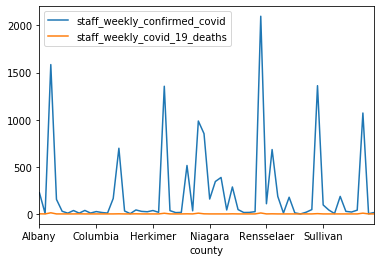

In [143]:
spdf.plot()

In [22]:
spdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Albany to Yates
Data columns (total 2 columns):
staff_weekly_confirmed_covid    60 non-null float64
staff_weekly_covid_19_deaths    60 non-null float64
dtypes: float64(2)
memory usage: 1.4+ KB


## 1.3 trend

In [25]:
tdf = df[df['county']=="Queens"]
tdf.head()

,federal_provider_number,provider_name,provider_address,provider_city,provider_state,provider_zip_code,submitted_data,county,geolocation,:@computed_region_ia25_mrsk,...,has_facility_performed_staff_and_or_personnel_tests_since_last_report,tested_staff_and_or_personnel_with_new_signs_or_symptoms,tested_asymptomatic_staff_and_or_personnel_in_a_unit_or_section_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_facility_wide_after_a_new_case,tested_asymptomatic_staff_and_or_personnel_without_known_exposure_as_surveillance,tested_another_subgroup_of_staff_and_or_personnel,number_of_ventilators_in,number_of_ventilators_in_1,any_current_supply_of,one_week_supply_of_ventilator
week_ending,,,,,,,,,,,,,,,,,,,,,
2020-05-24,335317,PARK TERRACE CARE CENTER,59 20 VAN DOREN STREET,CORONA,NY,11368,N,Queens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-07,335379,REGO PARK NURSING HOME,111 26 CORONA AVENUE,FLUSHING,NY,11368,N,Queens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-12,335862,NEW YORK-PRESBYTERIAN / QUEENS T C U,56-45 MAIN STREET,FLUSHING,NY,11355,Y,Queens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-12,335606,QUEEN OF PEACE RESIDENCE,110-30 221ST STREET,QUEENS VILLAGE,NY,11429,Y,Queens,"{'type': 'Point', 'coordinates': [-73.735913, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-16,335448,QUEENS NASSAU REHABILITATION AND NURSING CENTER,520 BEACH 19TH STREET,FAR ROCKAWAY,NY,11691,Y,Queens,"{'type': 'Point', 'coordinates': [-73.7522, 40...",NaN,...,Y,N,N,N,Y,N,NaN,NaN,NaN,NaN


In [124]:
df['staff_weekly_confirmed_covid']=df['staff_weekly_confirmed_covid'].fillna(0).astype(float)
df['staff_weekly_covid_19_deaths']=df['staff_weekly_covid_19_deaths'].fillna(0).astype(float)
tdf1 = df.groupby(by=['week_ending'])['staff_weekly_confirmed_covid','staff_weekly_covid_19_deaths'].sum()

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


·trend1

In [125]:
tdf1=pd.DataFrame(tdf1)
tdf1

,staff_weekly_confirmed_covid,staff_weekly_covid_19_deaths
week_ending,,
2020-05-24,5041.0,43.0
2020-05-31,2175.0,2.0
2020-06-07,1697.0,2.0
2020-06-14,991.0,0.0
2020-06-21,887.0,1.0
2020-06-28,759.0,0.0
2020-07-05,495.0,1.0
2020-07-12,430.0,0.0
2020-07-19,355.0,1.0


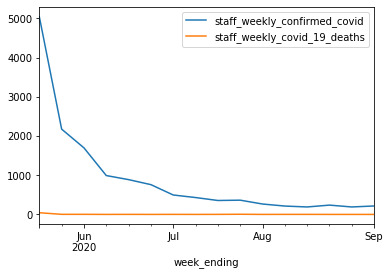

In [129]:
tdf1.plot()

In [130]:
tdf['residents_total_admissions']=tdf['residents_total_admissions'].fillna(0).astype(float)
tdf['residents_total_confirmed']=tdf['residents_total_confirmed'].fillna(0).astype(float)
tdf2 = df.groupby(by=['week_ending'])['residents_total_admissions','residents_total_confirmed'].sum()

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [138]:
df['residents_total_all_deaths']=df['residents_total_all_deaths'].fillna(0).astype(float)
df['number_of_all_beds']=df['number_of_all_beds'].fillna(0).astype(float)
df['total_number_of_occupied']=df['total_number_of_occupied'].fillna(0).astype(float)

/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [139]:
tdf3 = df.groupby(by=['week_ending'])['residents_total_all_deaths','number_of_all_beds','total_number_of_occupied'].sum()

In [140]:
tdf3

,residents_total_all_deaths,number_of_all_beds,total_number_of_occupied
week_ending,,,
2020-05-24,7000.0,102931.0,81592.0
2020-05-31,7635.0,105369.0,82230.0
2020-06-07,8353.0,108603.0,89392.0
2020-06-14,8893.0,109440.0,85515.0
2020-06-21,9336.0,110261.0,86077.0
2020-06-28,9771.0,110169.0,86186.0
2020-07-05,10185.0,110161.0,86192.0
2020-07-12,10593.0,110153.0,86274.0
2020-07-19,11004.0,110157.0,86328.0


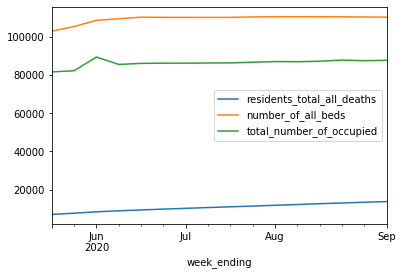

In [142]:
tdf3.plot()

It could be seen that there was an ample supply of beds.

## 1.4shortage of nursing staff analysis

In [144]:
df2 = df

In [152]:
sdf3=df2[["week_ending","shortage_of_nursing_staff","shortage_of_clinical_staff"]]

In [163]:
sdf31=sdf3.dropna()
sdf31

,week_ending,shortage_of_nursing_staff,shortage_of_clinical_staff
74,2020-07-12,N,N
127087,2020-06-14,N,N
133808,2020-05-31,N,N
133897,2020-08-02,N,N
134083,2020-08-23,N,N
...,...,...,...
156331,2020-06-14,N,N
156339,2020-06-28,N,N
156340,2020-07-19,N,N
156341,2020-08-23,N,N


In [176]:
a=df31["shortage_of_nursing_staff"].value_counts()
a

N    7901
Y    1684
Name: shortage_of_nursing_staff, dtype: int64

In [177]:
b=df31["shortage_of_clinical_staff"].value_counts()
b

N    9229
Y     356
Name: shortage_of_clinical_staff, dtype: int64

In [187]:
a=pd.DataFrame(a)
b=pd.DataFrame(b)
c=pd.merge(a,b,left_index=True,right_index=True)
c

,shortage_of_nursing_staff,shortage_of_clinical_staff
N,7901,9229
Y,1684,356


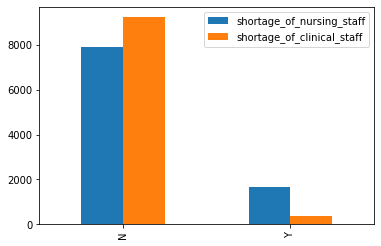

In [188]:
c.plot.bar(title="")

The above results indicate that nursing staff is more scarce than clinical staff.